In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [57]:
# Reading in the classification dataset
class_data = pd.read_csv("breast_cancer_wisconsin_diagnostic.csv")
class_data.info()
class_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [58]:
# Preprocessing Classification Dataset
class_data = class_data.drop(['id', 'Unnamed: 32'], axis=1)
target = class_data['diagnosis']
y = target
x = class_data.loc[:, class_data.columns!='diagnosis']

x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

SVM (rbf) Training Accuracy:  90.98901098901099
SVM (rbf) Testing Accuracy:  91.22807017543859
Confusion Matrix:
 [[62  3]
 [ 7 42]]
Classification Report:
               precision    recall  f1-score   support

           B       0.90      0.95      0.93        65
           M       0.93      0.86      0.89        49

    accuracy                           0.91       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



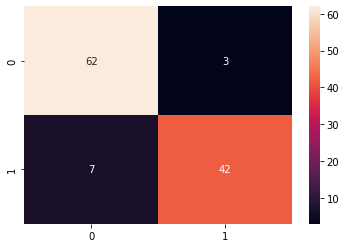

In [59]:
# SVM (rbf) Classifier
clf_s = SVC(kernel='rbf')

# Training Classifier (not excatly necessary since cross_val_predict is being used)
clf_s.fit(x_train, y_train)

# Cross Validating algorithm
y_train_pred = cross_val_predict(clf_s, x_train, y_train, cv=5)
training_acc = accuracy_score(y_train, y_train_pred)*100
print("SVM (rbf) Training Accuracy: ", training_acc)

y_test_pred = cross_val_predict(clf_s, x_test, y_test, cv=5)
testing_acc = accuracy_score(y_test, y_test_pred)*100
print("SVM (rbf) Testing Accuracy: ", testing_acc)

# Creating confusion matrix showing accuracy
conf_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat, annot=True)

# Showing report of classification metrics
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)


Ada Boosted Training Accuracy:  96.26373626373626
Ada Boosted Testing Accuracy:  92.10526315789474
Confusion Matrix:
 [[60  5]
 [ 4 45]]
Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.92      0.93        65
           M       0.90      0.92      0.91        49

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



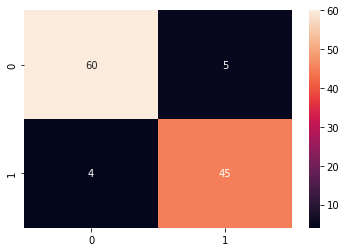

In [60]:
# Ada Boosted Classifier
base_estimator = DecisionTreeClassifier(max_depth=1)

# Finding best amount of estimators for optimization (n_estimators)
cv_scores = []
n_estimator_values = range(5,100)
for n_estimators in n_estimator_values:
    clf_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators)
    scores = cross_val_score(clf_boost, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
best_n_estimators = n_estimator_values[np.argmax(cv_scores)]

clf_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=best_n_estimators)

# Training Classifier (not excatly necessary since cross_val_predict is being used)
clf_boost.fit(x_train, y_train)

# Cross Validating algorithm
y_train_pred = cross_val_predict(clf_boost, x_train, y_train, cv=5)
training_acc = accuracy_score(y_train, y_train_pred)*100
print("Ada Boosted Training Accuracy: ", training_acc)

y_test_pred = cross_val_predict(clf_boost, x_test, y_test, cv=5)
testing_acc = accuracy_score(y_test, y_test_pred)*100
print("Ada Boosted Testing Accuracy: ", testing_acc)

# Creating confusion matrix showing accuracy
conf_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat, annot=True)

# Showing report of classification metrics
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)


Bagged Trees Training Accuracy:  95.82417582417582
Bagged Trees Testing Accuracy:  92.10526315789474
Confusion Matrix:
 [[61  4]
 [ 5 44]]
Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.94      0.93        65
           M       0.92      0.90      0.91        49

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



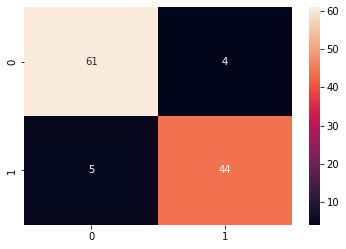

In [61]:
# Bagged Trees Classifier
base_estimator = DecisionTreeClassifier(max_depth=None)

# Finding best amount of estimators (n_estimators)
cv_scores = []
n_estimator_values = range(5,100)
for n_estimators in n_estimator_values:
    clf_bag = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators)
    scores = cross_val_score(clf_bag, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
best_n_estimators = n_estimator_values[np.argmax(cv_scores)]

clf_bag = BaggingClassifier(base_estimator=base_estimator, n_estimators=best_n_estimators)

# Training Classifier (not excatly necessary since cross_val_predict is being used)
clf_bag.fit(x_train, y_train)

# Cross Validating algorithm
y_train_pred = cross_val_predict(clf_bag, x_train, y_train, cv=5)
training_acc = accuracy_score(y_train, y_train_pred)*100
print("Bagged Trees Training Accuracy: ", training_acc)

y_test_pred = cross_val_predict(clf_bag, x_test, y_test, cv=5)
testing_acc = accuracy_score(y_test, y_test_pred)*100
print("Bagged Trees Testing Accuracy: ", testing_acc)

# Creating confusion matrix showing accuracy
conf_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_mat)
sns.heatmap(conf_mat, annot=True)

# Showing report of classification metrics
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", class_report)


In [3]:
# Reading in regression dataset
reg_data = pd.read_csv("QSAR_bioconcentration.csv")
reg_data.info()
reg_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAS       779 non-null    object 
 1   SMILES    779 non-null    object 
 2   Set       779 non-null    object 
 3   nHM       779 non-null    int64  
 4   piPC09    779 non-null    float64
 5   PCD       779 non-null    float64
 6   X2Av      779 non-null    float64
 7   MLOGP     779 non-null    float64
 8   ON1V      779 non-null    float64
 9   N-072     779 non-null    int64  
 10  B02[C-N]  779 non-null    int64  
 11  F04[C-O]  779 non-null    int64  
 12  Class     779 non-null    int64  
 13  logBCF    779 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 85.3+ KB


,CAS,SMILES,Set,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
0,100-02-7,O=[N+](c1ccc(cc1)O)[O-],Train,0,0.000,1.49,0.14,1.35,0.72,0,1,5,1,0.74
1,100-17-4,O=[N+](c1ccc(cc1)OC)[O-],Train,0,0.000,1.47,0.14,1.70,0.88,0,1,5,1,0.93
2,100-18-5,c1cc(ccc1C(C)C)C(C)C,Train,0,0.000,1.20,0.25,4.14,2.06,0,0,0,3,3.24
3,100-25-4,O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-],Train,0,0.000,1.69,0.13,1.89,0.79,0,1,8,3,-0.40
4,100-40-3,C=CC1CCC=CC1,Train,0,0.000,0.52,0.25,2.65,1.31,0,0,0,1,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,99-30-9,O=[N+]([O-])c1cc(c(N)c(c1)Cl)Cl,Train,2,0.000,1.48,0.17,2.57,0.73,0,1,4,1,1.88
775,99387-89-0,FC(F)(F)c2cc(ccc2(N=C(n1cncc1)COCCC))Cl,Test,1,6.564,2.37,0.16,3.77,2.28,0,1,3,2,2.59
776,99-65-0,O=[N+]([O-])c1cccc(c1)[N+](=O)[O-],Train,0,0.000,1.71,0.13,1.89,0.79,0,1,8,1,0.77
777,99-71-8,CC(c1ccc(cc1)O)CC,Test,0,0.000,1.19,0.21,2.81,1.69,0,0,1,3,1.35


<AxesSubplot:>

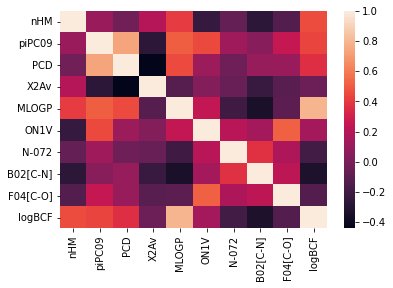

In [4]:
# Preprocessing regression dataset
reg_data = reg_data.drop(['CAS', 'SMILES', 'Set', 'Class'], axis=1)
target = reg_data['logBCF']
y = target
x = reg_data.loc[:, reg_data.columns!='logBCF']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

sns.heatmap(reg_data.corr(), annot=False)

kNN Training Scores:
 
  R2 Accuracy:  0.6450960097810597 
  RSME:  0.8193143249582922
kNN Testing Scores: 
  R2 Accuracy:  0.43864077196461204 
  RSME:  0.9335464500275144


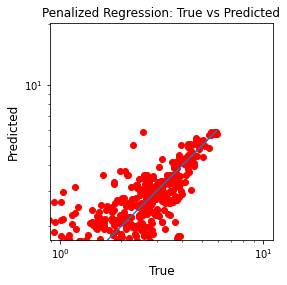

In [5]:
# kNN Regression Model
rgn_knn = KNeighborsRegressor(n_neighbors=2)

# Training Model (not excatly necessary since cross_val_predict is being used)
rgn_knn.fit(x_train, y_train)

# Cross Validating algorithm
y_train_pred = cross_val_predict(rgn_knn, x_train, y_train, cv=5)
y_test_pred = cross_val_predict(rgn_knn, x_test, y_test, cv=5)

# Calculating accuracy scores
accuracy_train = r2_score(y_train, y_train_pred)
rsme_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("kNN Training Scores:\n",
      "\n  R2 Accuracy: ", accuracy_train,
      "\n  RSME: ", rsme_train)

accuracy_test = r2_score(y_test, y_test_pred)
rsme_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("kNN Testing Scores:",
      "\n  R2 Accuracy: ", accuracy_test,
      "\n  RSME: ", rsme_test)

# Plotting Regression Model
plt.figure(figsize=(4,4))
plt.scatter(y_train, y_train_pred, c='red')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_train_pred), max(y_train))
p2 = min(min(y_train_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], '-')
plt.xlabel('True', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title("Penalized Regression: True vs Predicted")
plt.axis('equal')
plt.show()

Random Forest Training Scores: 
  R2 Accuracy:  0.7214187095082389 
  RSME:  0.7258904454091213
Random Forest Testing Scores: 
  R2 Accuracy:  0.6615975145986414 
  RSME:  0.7248235087363423


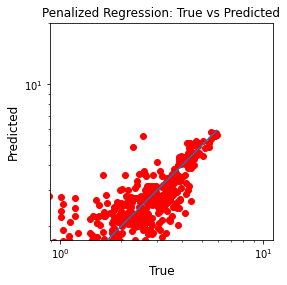

In [6]:
# Random Forest Regression Model
rgn_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training Model (not excatly necessary since cross_val_predict is being used)
rgn_rf.fit(x_train, y_train)

# Cross Validating algorithm
y_train_pred = cross_val_predict(rgn_rf, x_train, y_train, cv=5)
y_test_pred = cross_val_predict(rgn_rf, x_test, y_test, cv=5)

# Calculating accuracy scores
accuracy_train = r2_score(y_train, y_train_pred)
rsme_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Random Forest Training Scores:",
      "\n  R2 Accuracy: ", accuracy_train,
      "\n  RSME: ", rsme_train)

accuracy_test = r2_score(y_test, y_test_pred)
rsme_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Random Forest Testing Scores:",
      "\n  R2 Accuracy: ", accuracy_test,
      "\n  RSME: ", rsme_test)

# Plotting Regression Model
plt.figure(figsize=(4,4))
plt.scatter(y_train, y_train_pred, c='red')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_train_pred), max(y_train))
p2 = min(min(y_train_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], '-')
plt.xlabel('True', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title("Penalized Regression: True vs Predicted")
plt.axis('equal')
plt.show()

Polynomial Training Scores: 
  R2 Accuracy:  0.667340666252805 
  RSME:  0.793222388869508
Polynomial Testing Scores: 
  R2 Accuracy:  0.5143452801938722 
  RSME:  0.8683190029175807


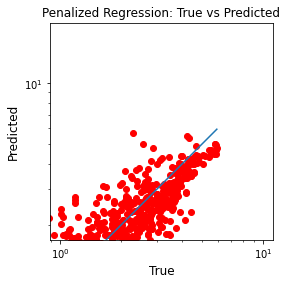

In [7]:
# Polynomial Regression Model
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)
rgn_poly = LinearRegression()

# Training Model (not excatly necessary since cross_val_predict is being used)
rgn_poly.fit(x_poly, y_train)

# Cross Validating algorithm
y_train_pred = cross_val_predict(rgn_poly, x_train, y_train, cv=5)
y_test_pred = cross_val_predict(rgn_poly, x_test, y_test, cv=5)

# Calculating accuracy scores
accuracy_train = r2_score(y_train, y_train_pred)
rsme_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Polynomial Training Scores:",
      "\n  R2 Accuracy: ", accuracy_train,
      "\n  RSME: ", rsme_train)

accuracy_test = r2_score(y_test, y_test_pred)
rsme_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Polynomial Testing Scores:",
      "\n  R2 Accuracy: ", accuracy_test,
      "\n  RSME: ", rsme_test)

# Plotting Regression Model
plt.figure(figsize=(4,4))
plt.scatter(y_train, y_train_pred, c='red')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_train_pred), max(y_train))
p2 = min(min(y_train_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], '-')
plt.xlabel('True', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.title("Penalized Regression: True vs Predicted")
plt.axis('equal')
plt.show()